# Authors: 
         Rutvik Pansare       
         Praksha maheshwari
         Vishal Phaugat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

In [25]:
# connection with database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rutu12345",
  database="project"
)
# Query to extract data from the database
query = "SELECT * FROM project.crime_data;"
df = pd.read_sql(query,mydb)

mydb.close() #close the connection


In [ ]:
df.head()

In [26]:
# convert date string to datetime format
from datetime import datetime
year_query = df.copy()
dates =[]
year_query['CMPLNT_FR_DT'] = pd.to_datetime(year_query['CMPLNT_FR_DT'])
year_query['YEAR'] = pd. DatetimeIndex(year_query['CMPLNT_FR_DT']).year

Text(0.5, 1.0, 'Total Crime events by Level Of crime In Year 2019')

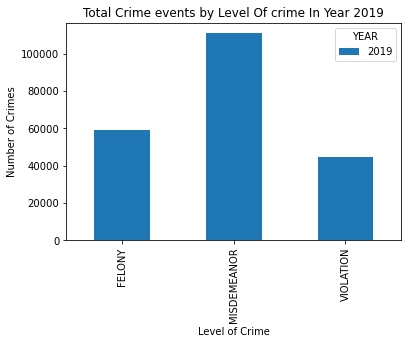

In [11]:
year_query = year_query[year_query.YEAR == 2019]
year_query.groupby('YEAR').LAW_CAT_CD.value_counts().unstack(0).plot.bar()
plt.ylabel('Number of Crimes')
plt.xlabel('Level of Crime')
plt.title('Total Crime events by Level Of crime In Year 2019')

In [56]:
year_query.PREM_TYP_DESC.value_counts().sort_values(ascending=False).head(10)

RESIDENCE - APT. HOUSE        523439
STREET                        364401
RESIDENCE-HOUSE               226181
RESIDENCE - PUBLIC HOUSING    181082
OTHER                          45212
CHAIN STORE                    39330
COMMERCIAL BUILDING            35713
DEPARTMENT STORE               34655
TRANSIT - NYC SUBWAY           33971
GROCERY/BODEGA                 20260
Name: PREM_TYP_DESC, dtype: int64

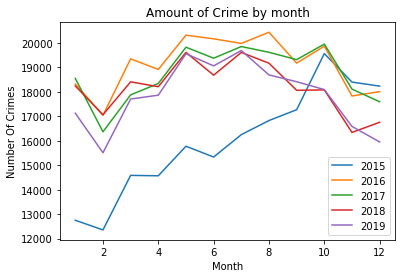

In [12]:
for i in range (2015,2020):
    yearwise = df[df.YEAR == i]
    dfMonth = yearwise.CMPLNT_FR_DT.dt.month
    vis1 = df.groupby(dfMonth)['CMPLNT_NUM'].count().plot()
    plt.legend(["2015","2016","2017","2018","2019"])
    plt.xlabel('Month')
    plt.ylabel("Number Of Crimes")
    plt.title('Amount of Crime by month')

Text(0.5, 1.0, 'Crimes by Hours')

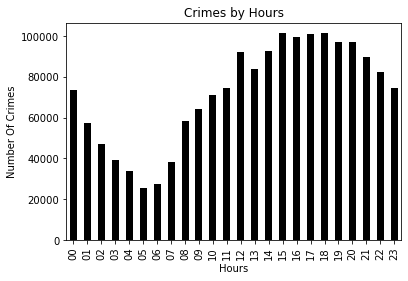

In [13]:
df = pd.read_csv('NYC_CleanedData.csv')
from datetime import datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
df2 = df.copy()
df2['CMPLNT_FR_TM'] = pd.to_datetime(df2['CMPLNT_FR_TM'])
df2['CMPLNT_FR_TM'] = df2['CMPLNT_FR_TM'].dt.strftime('%H')
df2.groupby('CMPLNT_FR_TM')['CMPLNT_NUM'].count().plot(kind='bar',color = "black")
plt.xlabel('Hours')
plt.ylabel("Number Of Crimes")
plt.title("Crimes by Hours")

Text(0.5, 1.0, 'Crimes by Month')

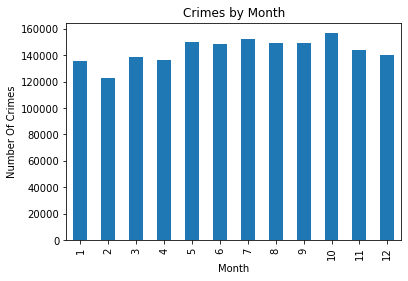

In [49]:
dfMonth = df.CMPLNT_FR_DT.dt.month
df.groupby(dfMonth)['CMPLNT_NUM'].count().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel("Number Of Crimes")
plt.title("Crimes by Month")

Text(0.5, 1.0, 'Sex crimes by year')

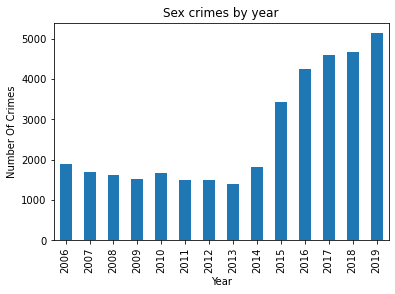

In [50]:
sex_crimes = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.groupby("YEAR")['CMPLNT_NUM'].count().plot(kind = "bar")
plt.xlabel('Year')
plt.ylabel("Number Of Crimes")
plt.title("Sex crimes by year")

In [5]:
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,100000228,2012-02-08,0 days 18:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,995500.0,...,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,"(40.576237762, -73.959504022)",45-64,WHITE,F,2012
1,100000272,2016-01-31,0 days 00:40:00,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,N.Y. POLICE DEPT,1011263.0,...,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,"(40.858249408, -73.902348526)",UNKNOWN,UNKNOWN,E,2016
2,100000480,2010-01-26,0 days 17:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,1017934.0,...,18-24,WHITE,M,40.804012949000004,-73.878331833,"(40.804012949, -73.878331833)",18-24,WHITE HISPANIC,M,2010
3,100000495,2017-11-24,0 days 20:10:00,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,993511.0,...,45-64,BLACK,M,40.675310519,-73.96661445,"(40.675310519, -73.96661445)",UNKNOWN,UNKNOWN,E,2017
4,100000926,2015-07-12,0 days 14:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,N.Y. POLICE DEPT,997321.0,...,25-44,BLACK,F,40.654621066,-73.952893562,"(40.654621066, -73.952893562)",25-44,ASIAN / PACIFIC ISLANDER,M,2015


In [7]:
year_query.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,X_COORD_CD,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,100000228,2012-02-08,0 days 18:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,995500.0,...,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,"(40.576237762, -73.959504022)",45-64,WHITE,F,2012
1,100000272,2016-01-31,0 days 00:40:00,DANGEROUS WEAPONS,COMPLETED,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,N.Y. POLICE DEPT,1011263.0,...,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,"(40.858249408, -73.902348526)",UNKNOWN,UNKNOWN,E,2016
2,100000480,2010-01-26,0 days 17:00:00,OFF. AGNST PUB ORD SENSBLTY &,COMPLETED,MISDEMEANOR,BRONX,STREET,N.Y. POLICE DEPT,1017934.0,...,18-24,WHITE,M,40.804012949000004,-73.878331833,"(40.804012949, -73.878331833)",18-24,WHITE HISPANIC,M,2010
3,100000495,2017-11-24,0 days 20:10:00,DANGEROUS DRUGS,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,N.Y. POLICE DEPT,993511.0,...,45-64,BLACK,M,40.675310519,-73.96661445,"(40.675310519, -73.96661445)",UNKNOWN,UNKNOWN,E,2017
4,100000926,2015-07-12,0 days 14:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,N.Y. POLICE DEPT,997321.0,...,25-44,BLACK,F,40.654621066,-73.952893562,"(40.654621066, -73.952893562)",25-44,ASIAN / PACIFIC ISLANDER,M,2015


<AxesSubplot:xlabel='LAW_CAT_CD'>

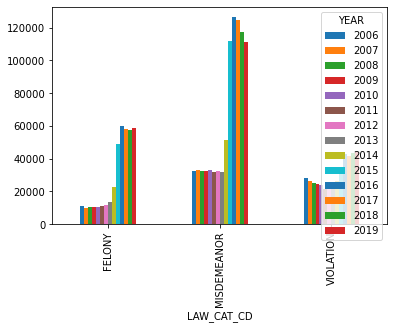

In [10]:
year_query.groupby('YEAR').LAW_CAT_CD.value_counts().unstack(0).plot.bar()

In [ ]:
X=year_query.iloc[:,:-1]
y=year_query['price_range']

In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [ ]:
### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)


In [9]:
year_query.drop(['CMPLNT_NUM', 'JURIS_DESC','X_COORD_CD','Y_COORD_CD','Lat_Lon'], axis=1, inplace=True)

In [10]:
year_query['CMPLNT_FR_TM'] = year_query['CMPLNT_FR_TM'].dt.components['hours']

In [11]:
year_query['CMPLNT_FR_DT'] = pd.DatetimeIndex(year_query['CMPLNT_FR_DT']).month

In [73]:
clean = year_query.drop(['OFNS_DESC'], axis=1)

In [13]:
clean = clean.drop(['YEAR'],axis = 1)

In [14]:
clean.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2,18,COMPLETED,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,45-64,WHITE,F
1,1,0,COMPLETED,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,E
2,1,17,COMPLETED,MISDEMEANOR,BRONX,STREET,18-24,WHITE,M,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,M
3,11,20,COMPLETED,MISDEMEANOR,BROOKLYN,STREET,45-64,BLACK,M,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,E
4,7,14,COMPLETED,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,25-44,BLACK,F,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,M


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
clean = clean
clean.LAW_CAT_CD = le.fit_transform(clean.LAW_CAT_CD)

AttributeError: 'DataFrame' object has no attribute 'town'

In [19]:
one_hot = pd.get_dummies(clean['LAW_CAT_CD'])
# Drop column B as it is now encoded
clean = clean.drop('LAW_CAT_CD',axis = 1)
# Join the encoded df
clean = clean.join(one_hot)
clean  

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,FELONY,MISDEMEANOR,VIOLATION
0,2,18,COMPLETED,BROOKLYN,RESIDENCE - APT. HOUSE,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,45-64,WHITE,F,0,1,0
1,1,0,COMPLETED,BRONX,BAR/NIGHT CLUB,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,E,0,1,0
2,1,17,COMPLETED,BRONX,STREET,18-24,WHITE,M,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,M,0,1,0
3,11,20,COMPLETED,BROOKLYN,STREET,45-64,BLACK,M,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,E,0,1,0
4,7,14,COMPLETED,BROOKLYN,DRY CLEANER/LAUNDRY,25-44,BLACK,F,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,M,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,COMPLETED,BRONX,STREET,25-44,BLACK,M,40.814847198,-73.89908132,UNKNOWN,UNKNOWN,E,0,1,0
1725047,6,18,COMPLETED,BROOKLYN,STORE UNCLASSIFIED,45-64,BLACK,F,40.639305956,-73.948339154,UNKNOWN,UNKNOWN,D,0,1,0
1725048,4,9,COMPLETED,QUEENS,RESIDENCE-HOUSE,25-44,BLACK,M,40.676568265,-73.79194598699999,25-44,WHITE HISPANIC,F,0,1,0
1725049,9,13,COMPLETED,BROOKLYN,CHAIN STORE,45-64,WHITE,F,40.609583959,-73.95843934199999,UNKNOWN,UNKNOWN,D,0,1,0


In [20]:
clean.drop(['VIOLATION'], axis=1, inplace=True)

In [21]:
clean.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,FELONY,MISDEMEANOR
0,2,18,COMPLETED,BROOKLYN,RESIDENCE - APT. HOUSE,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,45-64,WHITE,F,0,1
1,1,0,COMPLETED,BRONX,BAR/NIGHT CLUB,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,E,0,1
2,1,17,COMPLETED,BRONX,STREET,18-24,WHITE,M,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,M,0,1
3,11,20,COMPLETED,BROOKLYN,STREET,45-64,BLACK,M,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,E,0,1
4,7,14,COMPLETED,BROOKLYN,DRY CLEANER/LAUNDRY,25-44,BLACK,F,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,M,0,1


In [22]:
one_hot = pd.get_dummies(clean['CMPLNT_FR_TM'])
# Drop column B as it is now encoded
#clean = clean.drop('LAW_CAT_CD',axis = 1)
# Join the encoded df
clean = clean.join(one_hot)
clean  

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,...,14,15,16,17,18,19,20,21,22,23
0,2,18,COMPLETED,BROOKLYN,RESIDENCE - APT. HOUSE,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,...,0,0,0,0,1,0,0,0,0,0
1,1,0,COMPLETED,BRONX,BAR/NIGHT CLUB,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,...,0,0,0,0,0,0,0,0,0,0
2,1,17,COMPLETED,BRONX,STREET,18-24,WHITE,M,40.804012949000004,-73.878331833,...,0,0,0,1,0,0,0,0,0,0
3,11,20,COMPLETED,BROOKLYN,STREET,45-64,BLACK,M,40.675310519,-73.96661445,...,0,0,0,0,0,0,1,0,0,0
4,7,14,COMPLETED,BROOKLYN,DRY CLEANER/LAUNDRY,25-44,BLACK,F,40.654621066,-73.952893562,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,COMPLETED,BRONX,STREET,25-44,BLACK,M,40.814847198,-73.89908132,...,0,0,0,0,0,0,0,0,0,0
1725047,6,18,COMPLETED,BROOKLYN,STORE UNCLASSIFIED,45-64,BLACK,F,40.639305956,-73.948339154,...,0,0,0,0,1,0,0,0,0,0
1725048,4,9,COMPLETED,QUEENS,RESIDENCE-HOUSE,25-44,BLACK,M,40.676568265,-73.79194598699999,...,0,0,0,0,0,0,0,0,0,0
1725049,9,13,COMPLETED,BROOKLYN,CHAIN STORE,45-64,WHITE,F,40.609583959,-73.95843934199999,...,0,0,0,0,0,0,0,0,0,0


In [26]:
one_hot = pd.get_dummies(clean['SUSP_SEX'])
# Drop column B as it is now encoded
clean = clean.drop('SUSP_SEX',axis = 1)
# Join the encoded df
clean = clean.join(one_hot)
clean

ValueError: columns overlap but no suffix specified: Index(['UNKNOWN'], dtype='object')

In [28]:
clean.drop("UNKNOWN",inplace = True,axis =1)

In [29]:
clean.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,PREM_TYP_DESC,SUSP_AGE_GROUP,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,...,19,20,21,22,23,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
0,2,18,COMPLETED,RESIDENCE - APT. HOUSE,18-24,40.576237762,-73.959504022,45-64,WHITE,F,...,0,0,0,0,0,0,1,0,0,0
1,1,0,COMPLETED,BAR/NIGHT CLUB,45-64,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,E,...,0,0,0,0,0,1,0,0,0,0
2,1,17,COMPLETED,STREET,18-24,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,M,...,0,0,0,0,0,1,0,0,0,0
3,11,20,COMPLETED,STREET,45-64,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,E,...,0,1,0,0,0,0,1,0,0,0
4,7,14,COMPLETED,DRY CLEANER/LAUNDRY,25-44,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,M,...,0,0,0,0,0,0,1,0,0,0


In [30]:
one_hot = pd.get_dummies(clean['SUSP_SEX'])
# Drop column B as it is now encoded
clean = clean.drop('SUSP_SEX',axis = 1)
# Join the encoded df
clean = clean.join(one_hot)
clean

KeyError: 'SUSP_SEX'

In [31]:
# connection with database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rutu12345",
  database="project"
)
# Query to extract data from the database
query = "SELECT SUSP_SEX FROM project.crime_data;"
df = pd.read_sql(query,mydb)

mydb.close() #close the connection



In [32]:
clean["SUSP_SEX"] = df.SUSP_SEX
one_hot = pd.get_dummies(clean['SUSP_SEX'])
clean = clean.join(one_hot)
clean = clean.drop('SUSP_SEX',axis = 1)
clean

,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,PREM_TYP_DESC,SUSP_AGE_GROUP,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,...,23,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,F,M,U,UNKNOWN
0,2,18,COMPLETED,RESIDENCE - APT. HOUSE,18-24,40.576237762,-73.959504022,45-64,WHITE,F,...,0,0,1,0,0,0,0,1,0,0
1,1,0,COMPLETED,BAR/NIGHT CLUB,45-64,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,E,...,0,1,0,0,0,0,0,1,0,0
2,1,17,COMPLETED,STREET,18-24,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,M,...,0,1,0,0,0,0,0,1,0,0
3,11,20,COMPLETED,STREET,45-64,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,E,...,0,0,1,0,0,0,0,1,0,0
4,7,14,COMPLETED,DRY CLEANER/LAUNDRY,25-44,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,M,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,COMPLETED,STREET,25-44,40.814847198,-73.89908132,UNKNOWN,UNKNOWN,E,...,0,1,0,0,0,0,0,1,0,0
1725047,6,18,COMPLETED,STORE UNCLASSIFIED,45-64,40.639305956,-73.948339154,UNKNOWN,UNKNOWN,D,...,0,0,1,0,0,0,1,0,0,0
1725048,4,9,COMPLETED,RESIDENCE-HOUSE,25-44,40.676568265,-73.79194598699999,25-44,WHITE HISPANIC,F,...,0,0,0,0,1,0,0,1,0,0
1725049,9,13,COMPLETED,CHAIN STORE,45-64,40.609583959,-73.95843934199999,UNKNOWN,UNKNOWN,D,...,0,0,1,0,0,0,1,0,0,0


In [34]:
clean = clean.drop(['CRM_ATPT_CPTD_CD','VIC_SEX'],axis = 1)

In [35]:
clean.columns

Index([  'CMPLNT_FR_DT',   'CMPLNT_FR_TM',  'PREM_TYP_DESC', 'SUSP_AGE_GROUP',
             'Latitude',      'Longitude',  'VIC_AGE_GROUP',       'VIC_RACE',
               'FELONY',    'MISDEMEANOR',                0,                1,
                      2,                3,                4,                5,
                      6,                7,                8,                9,
                     10,               11,               12,               13,
                     14,               15,               16,               17,
                     18,               19,               20,               21,
                     22,               23,          'BRONX',       'BROOKLYN',
            'MANHATTAN',         'QUEENS',  'STATEN ISLAND',              'F',
                    'M',              'U',        'UNKNOWN'],
      dtype='object')

In [37]:
clean = clean.drop('UNKNOWN',axis = 1)
one_hot = pd.get_dummies(clean['PREM_TYP_DESC'])
clean = clean.join(one_hot)
clean = clean.drop('PREM_TYP_DESC',axis = 1)
clean

,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,FELONY,MISDEMEANOR,0,...,TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TELECOMM. STORE,TRAMWAY,TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),TUNNEL,UNKNOWN,VARIETY STORE,VIDEO STORE
0,2,18,18-24,40.576237762,-73.959504022,45-64,WHITE,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,45-64,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,17,18-24,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11,20,45-64,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7,14,25-44,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,25-44,40.814847198,-73.89908132,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1725047,6,18,45-64,40.639305956,-73.948339154,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1725048,4,9,25-44,40.676568265,-73.79194598699999,25-44,WHITE HISPANIC,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1725049,9,13,45-64,40.609583959,-73.95843934199999,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = clean
dfle.SUSP_AGE_GROUP = le.fit_transform(dfle.SUSP_AGE_GROUP)
dfle

,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,VIC_AGE_GROUP,VIC_RACE,FELONY,MISDEMEANOR,0,...,TAXI (YELLOW LICENSED),TAXI/LIVERY (UNLICENSED),TELECOMM. STORE,TRAMWAY,TRANSIT - NYC SUBWAY,TRANSIT FACILITY (OTHER),TUNNEL,UNKNOWN,VARIETY STORE,VIDEO STORE
0,2,18,0,40.576237762,-73.959504022,45-64,WHITE,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,40.858249408,-73.902348526,UNKNOWN,UNKNOWN,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,17,0,40.804012949000004,-73.878331833,18-24,WHITE HISPANIC,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11,20,2,40.675310519,-73.96661445,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7,14,1,40.654621066,-73.952893562,25-44,ASIAN / PACIFIC ISLANDER,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,1,40.814847198,-73.89908132,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1725047,6,18,2,40.639305956,-73.948339154,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1725048,4,9,1,40.676568265,-73.79194598699999,25-44,WHITE HISPANIC,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1725049,9,13,2,40.609583959,-73.95843934199999,UNKNOWN,UNKNOWN,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
dfle.drop(['VIC_AGE_GROUP','VIC_RACE'],axis = 1,inplace = True)

In [40]:
dfle.drop(['CMPLNT_FR_DT','CMPLNT_FR_TM'],axis = 1,inplace = True)

In [48]:
dfle.head()
df = dfle[:200000] 

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('SUSP_AGE_GROUP',axis=1))

StandardScaler()

In [50]:
scaled_features = scaler.transform(df.drop('SUSP_AGE_GROUP',axis=1))

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['SUSP_AGE_GROUP'],
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
print(confusion_matrix(y_test,pred))

[[ 2885  6358  2024   172   813]
 [ 6533 17323  5848   512  1613]
 [ 2181  6120  2392   217   599]
 [  158   480   192    38    42]
 [  753  1641   511    48   547]]


In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.23      0.24      0.23     12252
           1       0.54      0.54      0.54     31829
           2       0.22      0.21      0.21     11509
           3       0.04      0.04      0.04       910
           4       0.15      0.16      0.15      3500

    accuracy                           0.39     60000
   macro avg       0.24      0.24      0.24     60000
weighted avg       0.39      0.39      0.39     60000



In [59]:
year_query.PREM_TYP_DESC.value_counts().sort_values(ascending=False).head(10)

RESIDENCE - APT. HOUSE        523439
STREET                        364401
RESIDENCE-HOUSE               226181
RESIDENCE - PUBLIC HOUSING    181082
OTHER                          45212
CHAIN STORE                    39330
COMMERCIAL BUILDING            35713
DEPARTMENT STORE               34655
TRANSIT - NYC SUBWAY           33971
GROCERY/BODEGA                 20260
Name: PREM_TYP_DESC, dtype: int64

In [74]:
clean = clean.drop(['CRM_ATPT_CPTD_CD','VIC_SEX','VIC_AGE_GROUP'],axis = 1)
clean.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,VIC_RACE,YEAR
0,2,18,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,18-24,BLACK HISPANIC,M,40.576237762,-73.959504022,WHITE,2012
1,1,0,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,45-64,BLACK HISPANIC,M,40.858249408,-73.902348526,UNKNOWN,2016
2,1,17,MISDEMEANOR,BRONX,STREET,18-24,WHITE,M,40.804012949000004,-73.878331833,WHITE HISPANIC,2010
3,11,20,MISDEMEANOR,BROOKLYN,STREET,45-64,BLACK,M,40.675310519,-73.96661445,UNKNOWN,2017
4,7,14,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,25-44,BLACK,F,40.654621066,-73.952893562,ASIAN / PACIFIC ISLANDER,2015


In [91]:
one_hot = pd.get_dummies(clean['LAW_CAT_CD'])
clean = clean.join(one_hot)
clean = clean.drop('LAW_CAT_CD',axis = 1)
clean

,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,YEAR,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,...,SYNAGOGUE,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
0,2,18,0,40.576237762,-73.959504022,2012,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,2,40.858249408,-73.902348526,2016,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,17,0,40.804012949000004,-73.878331833,2010,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,11,20,2,40.675310519,-73.96661445,2017,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,7,14,1,40.654621066,-73.952893562,2015,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,1,40.814847198,-73.89908132,2016,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1725047,6,18,2,40.639305956,-73.948339154,2015,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1725048,4,9,1,40.676568265,-73.79194598699999,2012,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1725049,9,13,2,40.609583959,-73.95843934199999,2015,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [90]:
clean = clean.drop(['UNKNOWN'],axis = 1)

In [92]:
clean.to_csv('clean.csv')

In [81]:
clean.rename(columns = {'F':'SUS_F','M':'SUS_M'}, inplace = True)

In [77]:
year_query.VIC_RACE.value_counts().sort_values(ascending=False).head(10)

BLACK                             525468
UNKNOWN                           466877
WHITE HISPANIC                    340777
WHITE                             230800
ASIAN / PACIFIC ISLANDER           82008
BLACK HISPANIC                     72296
AMERICAN INDIAN/ALASKAN NATIVE      6822
OTHER                                  3
Name: VIC_RACE, dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

clean.SUSP_AGE_GROUP = le.fit_transform(clean.SUSP_AGE_GROUP)
clean

,CMPLNT_FR_DT,CMPLNT_FR_TM,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,SUSP_AGE_GROUP,Latitude,Longitude,YEAR,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC
0,2,18,MISDEMEANOR,BROOKLYN,RESIDENCE - APT. HOUSE,0,40.576237762,-73.959504022,2012,0,1,0,0,0,1,0
1,1,0,MISDEMEANOR,BRONX,BAR/NIGHT CLUB,2,40.858249408,-73.902348526,2016,0,1,0,0,0,0,0
2,1,17,MISDEMEANOR,BRONX,STREET,0,40.804012949000004,-73.878331833,2010,0,1,0,0,0,0,1
3,11,20,MISDEMEANOR,BROOKLYN,STREET,2,40.675310519,-73.96661445,2017,0,1,0,0,0,0,0
4,7,14,MISDEMEANOR,BROOKLYN,DRY CLEANER/LAUNDRY,1,40.654621066,-73.952893562,2015,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1725046,9,13,MISDEMEANOR,BRONX,STREET,1,40.814847198,-73.89908132,2016,0,1,0,0,0,0,0
1725047,6,18,MISDEMEANOR,BROOKLYN,STORE UNCLASSIFIED,2,40.639305956,-73.948339154,2015,1,0,0,0,0,0,0
1725048,4,9,MISDEMEANOR,QUEENS,RESIDENCE-HOUSE,1,40.676568265,-73.79194598699999,2012,0,1,0,0,0,0,1
1725049,9,13,MISDEMEANOR,BROOKLYN,CHAIN STORE,2,40.609583959,-73.95843934199999,2015,1,0,0,0,0,0,0


In [62]:
clean = pd.read_csv('clean.csv')
df = clean[:200000] 

In [55]:
clean.columns

Index(['Unnamed: 0', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'SUSP_AGE_GROUP',
       'Latitude', 'Longitude', 'YEAR', 'SUS_F', 'SUS_M',
       'ASIAN / PACIFIC ISLANDER', 'BLACK', 'BLACK HISPANIC', 'WHITE',
       'WHITE HISPANIC', 'ABANDONED BUILDING', 'AIRPORT TERMINAL', 'ATM',
       'BANK', 'BAR/NIGHT CLUB', 'BEAUTY & NAIL SALON', 'BOOK/CARD', 'BRIDGE',
       'BUS (NYC TRANSIT)', 'BUS (OTHER)', 'BUS STOP', 'BUS TERMINAL',
       'CANDY STORE', 'CEMETERY', 'CHAIN STORE', 'CHECK CASHING BUSINESS',
       'CHURCH', 'CLOTHING/BOUTIQUE', 'COMMERCIAL BUILDING',
       'CONSTRUCTION SITE', 'DAYCARE FACILITY', 'DEPARTMENT STORE',
       'DOCTOR/DENTIST OFFICE', 'DRUG STORE', 'DRY CLEANER/LAUNDRY',
       'FACTORY/WAREHOUSE', 'FAST FOOD', 'FERRY/FERRY TERMINAL',
       'FOOD SUPERMARKET', 'GAS STATION', 'GROCERY/BODEGA',
       'GYM/FITNESS FACILITY', 'HIGHWAY/PARKWAY', 'HOMELESS SHELTER',
       'HOSPITAL', 'HOTEL/MOTEL', 'JEWELRY', 'LIQUOR STORE', 'LOAN COMPANY',
       'MAILBOX INSIDE', 'MAILB

# PRIDICT LEVEL OF CRIME

In [63]:
clean.head()
df2 = year_query["BORO_NM"]

df1 = df[["SUS_F",'SUS_M','ASIAN / PACIFIC ISLANDER','BLACK','BLACK HISPANIC','WHITE','WHITE HISPANIC','RESIDENCE - APT. HOUSE','STREET','RESIDENCE - PUBLIC HOUSING','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND','BRONX']]

In [81]:
df1

,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC,RESIDENCE - APT. HOUSE,STREET,RESIDENCE - PUBLIC HOUSING,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,BRONX,SUSP_AGE_GROUP
0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2
2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,2
4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
199996,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
199997,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
199998,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1


In [64]:
df1["SUSP_AGE_GROUP"] = clean["SUSP_AGE_GROUP"]

<ipython-input-64-6effe41064ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["SUSP_AGE_GROUP"] = clean["SUSP_AGE_GROUP"]


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df2 = le.fit_transform(df2)
df2 = df2[:200000] 

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1)

StandardScaler()

In [71]:
scaled_features = scaler.transform(df1)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df2,
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,pred))

[[14696     0     0     0     0     0]
 [    0 17652     0     0     0     0]
 [    0     0 12447     0     0     0]
 [    0     0     0 12012     0     0]
 [    0     0     0     0  3032     0]
 [    0     4     0     0     0   157]]


In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14696
           1       1.00      1.00      1.00     17652
           2       1.00      1.00      1.00     12447
           3       1.00      1.00      1.00     12012
           4       1.00      1.00      1.00      3032
           5       1.00      0.98      0.99       161

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



 DECISION TREE

In [78]:
from sklearn.tree import DecisionTreeClassifier #
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['SUSP_AGE_GROUP'],
                                                    test_size=0.30)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)



In [80]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# Pridict the suspect age group

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('SUSP_AGE_GROUP',axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(df.drop('SUSP_AGE_GROUP',axis=1))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['SUSP_AGE_GROUP'],
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
print(confusion_matrix(y_test,pred))

[[ 2874  6305  2114   160   778]
 [ 6611 17140  6031   510  1665]
 [ 2164  5773  2491   234   615]
 [  164   450   233    23    52]
 [  796  1648   566    36   567]]


In [11]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.23      0.23      0.23     12231
           1       0.55      0.54      0.54     31957
           2       0.22      0.22      0.22     11277
           3       0.02      0.02      0.02       922
           4       0.15      0.16      0.16      3613

    accuracy                           0.38     60000
   macro avg       0.23      0.23      0.23     60000
weighted avg       0.39      0.38      0.39     60000



In [12]:
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
f1_score(y_test, pred, average='macro')

0.23449887710726128

In [13]:
f1_score(y_test, pred, average='micro')

0.3849166666666667

In [14]:
from sklearn.tree import DecisionTreeClassifier #
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['SUSP_AGE_GROUP'],
                                                    test_size=0.30)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


In [15]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5318833333333334


In [16]:
#importing sklearn packages:

from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Importing statsmodels  modules  
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
df.head()

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,YEAR,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,...,SYNAGOGUE,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
0,0,2,18,0,40.576238,-73.959504,2012,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0,2,40.858249,-73.902349,2016,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,2,1,17,0,40.804013,-73.878332,2010,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,3,11,20,2,40.675311,-73.966614,2017,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,4,7,14,1,40.654621,-73.952894,2015,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [21]:
df = clean[:200000] 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('CMPLNT_FR_TM',axis=1))
scaled_features = scaler.transform(df.drop('CMPLNT_FR_TM',axis=1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['CMPLNT_FR_TM'],
                                                    test_size=0.30)

In [22]:
clf = LinearRegression()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)
print("Training accuracy:",clf.score(X_train,y_train))
print("Testing accuracy:",clf.score(X_test,y_test))

Training accuracy: 0.017089220827815388
Testing accuracy: 0.014802328166327317


In [27]:
clean['date'] =  year_query['CMPLNT_FR_DT']

In [28]:
clean.head()

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,YEAR,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,...,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION,date
0,0,2,18,0,40.576238,-73.959504,2012,0,1,0,...,0,0,1,0,0,0,0,1,0,2012-02-08
1,1,1,0,2,40.858249,-73.902349,2016,0,1,0,...,0,1,0,0,0,0,0,1,0,2016-01-31
2,2,1,17,0,40.804013,-73.878332,2010,0,1,0,...,0,1,0,0,0,0,0,1,0,2010-01-26
3,3,11,20,2,40.675311,-73.966614,2017,0,1,0,...,0,0,1,0,0,0,0,1,0,2017-11-24
4,4,7,14,1,40.654621,-73.952894,2015,1,0,1,...,0,0,1,0,0,0,0,1,0,2015-07-12


In [29]:
vis1 = clean.groupby("date).count()

SyntaxError: EOL while scanning string literal (<ipython-input-29-4430350840a3>, line 1)

In [30]:
vis1

NameError: name 'vis1' is not defined

In [31]:
clean['CMPLNT_NUM'] =  year_query['CMPLNT_NUM']

In [32]:
clean['BORO_NM'] =  year_query['BORO_NM']

In [33]:
linear = clean.copy()

In [34]:
vis1 = linear.groupby(["date",'BORO_NM']).sum().reset_index()

In [35]:
vis1.drop(["CMPLNT_FR_TM",'YEAR','SUSP_AGE_GROUP'],axis = 1,inplace = True)

In [36]:
vis1

,date,BORO_NM,Unnamed: 0,CMPLNT_FR_DT,Latitude,Longitude,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,...,SYNAGOGUE,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
0,2006-01-01,BRONX,61840648,84,3430.932198,-6206.715154,13,71,0,31,...,0,0,84,0,0,0,0,23,32,29
1,2006-01-01,BROOKLYN,112843006,113,4594.350623,-8356.006188,15,98,2,50,...,0,0,0,113,0,0,0,31,50,32
2,2006-01-01,MANHATTAN,69793641,74,3018.392478,-5473.137676,15,59,1,20,...,0,0,0,0,74,0,0,21,32,21
3,2006-01-01,QUEENS,78522285,89,3622.900532,-6571.333967,18,70,8,30,...,0,0,0,0,0,89,0,29,42,18
4,2006-01-01,STATEN ISLAND,19419668,23,934.003716,-1704.591111,3,19,1,1,...,0,0,0,0,0,0,23,5,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28068,2019-12-31,BROOKLYN,117063008,1584,5366.726608,-9760.474709,30,95,5,57,...,0,1,0,132,0,0,0,42,52,38
28069,2019-12-31,MANHATTAN,90079365,1356,4607.230573,-8358.578106,20,87,5,22,...,0,0,0,0,113,0,0,24,70,19
28070,2019-12-31,QUEENS,76167598,1056,3582.825649,-6496.683485,22,64,16,20,...,0,0,0,0,0,88,0,17,44,27
28071,2019-12-31,STATEN ISLAND,18341592,252,852.600059,-1557.040025,5,16,0,3,...,0,0,0,0,0,0,21,5,11,5


In [37]:
vis2 = linear.groupby(["date",'BORO_NM'])['CMPLNT_NUM'].count().reset_index()

In [38]:
vis1['Total'] = vis2['CMPLNT_NUM']

In [39]:
# label encoding the target column - i have kept suspect age as target.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = vis1
dfle.SUSP_AGE_GROUP = le.fit_transform(dfle.BORO_NM)
dfle

<ipython-input-39-22bbb30baf8f>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfle.SUSP_AGE_GROUP = le.fit_transform(dfle.BORO_NM)


,date,BORO_NM,Unnamed: 0,CMPLNT_FR_DT,Latitude,Longitude,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,...,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION,Total
0,2006-01-01,BRONX,61840648,84,3430.932198,-6206.715154,13,71,0,31,...,0,84,0,0,0,0,23,32,29,84
1,2006-01-01,BROOKLYN,112843006,113,4594.350623,-8356.006188,15,98,2,50,...,0,0,113,0,0,0,31,50,32,113
2,2006-01-01,MANHATTAN,69793641,74,3018.392478,-5473.137676,15,59,1,20,...,0,0,0,74,0,0,21,32,21,74
3,2006-01-01,QUEENS,78522285,89,3622.900532,-6571.333967,18,70,8,30,...,0,0,0,0,89,0,29,42,18,89
4,2006-01-01,STATEN ISLAND,19419668,23,934.003716,-1704.591111,3,19,1,1,...,0,0,0,0,0,23,5,14,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28068,2019-12-31,BROOKLYN,117063008,1584,5366.726608,-9760.474709,30,95,5,57,...,1,0,132,0,0,0,42,52,38,132
28069,2019-12-31,MANHATTAN,90079365,1356,4607.230573,-8358.578106,20,87,5,22,...,0,0,0,113,0,0,24,70,19,113
28070,2019-12-31,QUEENS,76167598,1056,3582.825649,-6496.683485,22,64,16,20,...,0,0,0,0,88,0,17,44,27,88
28071,2019-12-31,STATEN ISLAND,18341592,252,852.600059,-1557.040025,5,16,0,3,...,0,0,0,0,0,21,5,11,5,21


In [40]:
for i in ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']:
    new_column = []
    for j in dfle[i]:
        if j == 0.0:
            new_column.append(0)
        else:
            new_column.append(1)
    dfle[i]=new_column

In [41]:
df = dfle.copy()
df = df.drop(['date','BORO_NM'],axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Total',axis=1))
scaled_features = scaler.transform(df.drop('Total',axis=1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Total'],
                                                    test_size=0.30)

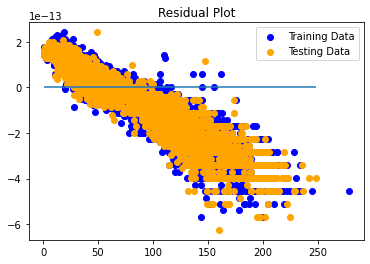

In [42]:

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [51]:
X_train

array([[-0.141123  ,  0.18784139, -0.38625238, ..., -0.45342838,
        -0.50210859,  0.1781261 ],
       [-0.5329306 , -0.59971524, -0.51544088, ..., -0.70973264,
        -0.50210859, -0.11707643],
       [ 1.7838545 ,  0.46215886,  1.74850881, ...,  0.44363654,
         2.57353211,  0.76853117],
       ...,
       [-0.6634318 , -0.6616579 , -0.64718466, ..., -0.64565657,
        -0.79975123, -0.01867558],
       [ 1.48803225,  0.35597145,  1.52223626, ...,  0.82809293,
         1.51524714,  2.14614299],
       [-0.56757638, -0.44043413, -0.6682444 , ..., -0.51750444,
        -0.63439421, -0.80588234]])

In [43]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.162639148389775e-26, R2: 1.0


In [44]:
prediction = model.predict(X_test)
print("Training accuracy:",model.score(X_train,y_train))
print("Testing accuracy:",model.score(X_test,y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


array([[-0.141123  ,  0.18784139, -0.38625238, ..., -0.45342838,
        -0.50210859,  0.1781261 ],
       [-0.5329306 , -0.59971524, -0.51544088, ..., -0.70973264,
        -0.50210859, -0.11707643],
       [ 1.7838545 ,  0.46215886,  1.74850881, ...,  0.44363654,
         2.57353211,  0.76853117],
       ...,
       [-0.6634318 , -0.6616579 , -0.64718466, ..., -0.64565657,
        -0.79975123, -0.01867558],
       [ 1.48803225,  0.35597145,  1.52223626, ...,  0.82809293,
         1.51524714,  2.14614299],
       [-0.56757638, -0.44043413, -0.6682444 , ..., -0.51750444,
        -0.63439421, -0.80588234]])

ValueError: x and y must be the same size

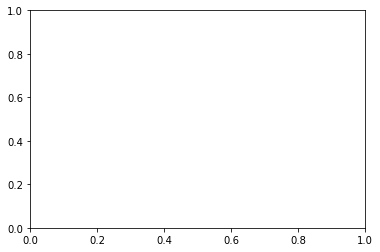

In [52]:
plt.scatter(X_train,y_train, color = 'red')
plt.plot(X_train,model.predict(X_train), color ='blue')
plt.title('Total')
plt.xlabel('New Vaccinations')
plt.ylabel('Mobility')
plt.show()

In [46]:
predictions = model.predict(X_test)

In [47]:
print(predictions)

[165.  50. 106. ...  36. 152. 164.]


In [48]:
import statsmodels.api as sm
X = dfle.drop(['Total','date'],axis = 1)
y = dfle['Total']
dfle.head()

,date,BORO_NM,Unnamed: 0,CMPLNT_FR_DT,Latitude,Longitude,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,...,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION,Total
0,2006-01-01,BRONX,61840648,84,3430.932198,-6206.715154,13,71,0,31,...,0,1,0,0,0,0,23,32,29,84
1,2006-01-01,BROOKLYN,112843006,113,4594.350623,-8356.006188,15,98,2,50,...,0,0,1,0,0,0,31,50,32,113
2,2006-01-01,MANHATTAN,69793641,74,3018.392478,-5473.137676,15,59,1,20,...,0,0,0,1,0,0,21,32,21,74
3,2006-01-01,QUEENS,78522285,89,3622.900532,-6571.333967,18,70,8,30,...,0,0,0,0,1,0,29,42,18,89
4,2006-01-01,STATEN ISLAND,19419668,23,934.003716,-1704.591111,3,19,1,1,...,0,0,0,0,0,1,5,14,4,23


In [49]:
dfle.dtypes

date             datetime64[ns]
BORO_NM                  object
Unnamed: 0                int64
CMPLNT_FR_DT              int64
Latitude                float64
                      ...      
STATEN ISLAND             int64
FELONY                    int64
MISDEMEANOR               int64
VIOLATION                 int64
Total                     int64
Length: 87, dtype: object

In [244]:
X = sm.add_constant(X)

In [245]:

## fit a OLS model with intercept on TV and Radio

model= sm.OLS(y, X).fit()

In [246]:
import matplotlib.pyplot as plt
X.iloc[:,1:].corr()

,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC,ABANDONED BUILDING,AIRPORT TERMINAL,ATM,...,SYNAGOGUE,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION
SUS_F,1.000000,0.927574,0.532608,0.848449,0.599049,0.674897,0.781326,0.087925,0.147693,0.125788,...,0.127291,0.252552,0.174002,0.339574,0.069332,0.030386,-0.355953,0.912939,0.934363,0.825342
SUS_M,0.927574,1.000000,0.573435,0.858595,0.608719,0.696089,0.811693,0.096124,0.173859,0.140043,...,0.138556,0.260296,0.180590,0.336653,0.083586,0.055886,-0.398199,0.954447,0.978761,0.830838
ASIAN / PACIFIC ISLANDER,0.532608,0.573435,1.000000,0.406529,0.091647,0.557814,0.441359,0.071564,0.557384,0.079723,...,0.087806,0.129259,-0.197525,0.057102,-0.018660,0.586158,-0.277889,0.599154,0.522383,0.522052
BLACK,0.848449,0.858595,0.406529,1.000000,0.468383,0.624571,0.652492,0.080580,0.049134,0.092701,...,0.162759,0.212687,0.140446,0.660624,-0.074109,-0.048344,-0.430492,0.832022,0.804648,0.863075
BLACK HISPANIC,0.599049,0.608719,0.091647,0.468383,1.000000,0.118951,0.723253,0.035200,-0.070883,0.076844,...,0.030388,0.170485,0.601357,-0.026605,0.099531,-0.178724,-0.324326,0.521535,0.639579,0.506345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
QUEENS,0.030386,0.055886,0.586158,-0.048344,-0.178724,0.136535,0.115801,0.027907,0.586657,-0.013740,...,-0.009494,-0.015581,-0.222692,-0.222692,-0.222692,1.000000,-0.222585,0.055403,0.014784,0.131493
STATEN ISLAND,-0.355953,-0.398199,-0.277889,-0.430492,-0.324326,-0.085684,-0.441008,-0.028030,-0.131174,-0.044856,...,-0.046328,-0.081459,-0.222585,-0.222585,-0.222585,-0.222585,1.000000,-0.344141,-0.362116,-0.445943
FELONY,0.912939,0.954447,0.599154,0.832022,0.521535,0.710869,0.727198,0.094702,0.189478,0.136874,...,0.146284,0.253035,0.073151,0.344444,0.058691,0.055403,-0.344141,1.000000,0.914537,0.754633
MISDEMEANOR,0.934363,0.978761,0.522383,0.804648,0.639579,0.648195,0.807539,0.095251,0.148970,0.142816,...,0.121713,0.265524,0.216743,0.261988,0.114335,0.014784,-0.362116,0.914537,1.000000,0.752119


In [247]:
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2

In [248]:
## Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(X,y)


In [249]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

In [250]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)


In [252]:
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,const,5.438308e-29
1,SUS_F,2.875798e+05
2,SUS_M,9.779396e+05
3,ASIAN / PACIFIC ISLANDER,8.505004e+04
4,BLACK,3.521482e+05
...,...,...
76,QUEENS,4.684022e+03
77,STATEN ISLAND,1.605242e+04
78,FELONY,4.550312e+05
79,MISDEMEANOR,7.717735e+05


In [253]:
features_rank.nlargest(10,'Score')

,Features,Score
2,SUS_M,977939.554790
79,MISDEMEANOR,771773.498648
78,FELONY,455031.202949
70,STREET,442815.150857
4,BLACK,352148.242058
61,RESIDENCE - APT. HOUSE,299739.467106
1,SUS_F,287579.842608
7,WHITE HISPANIC,176285.335708
80,VIOLATION,156846.570108
62,RESIDENCE - PUBLIC HOUSING,144352.380866


<AxesSubplot:>

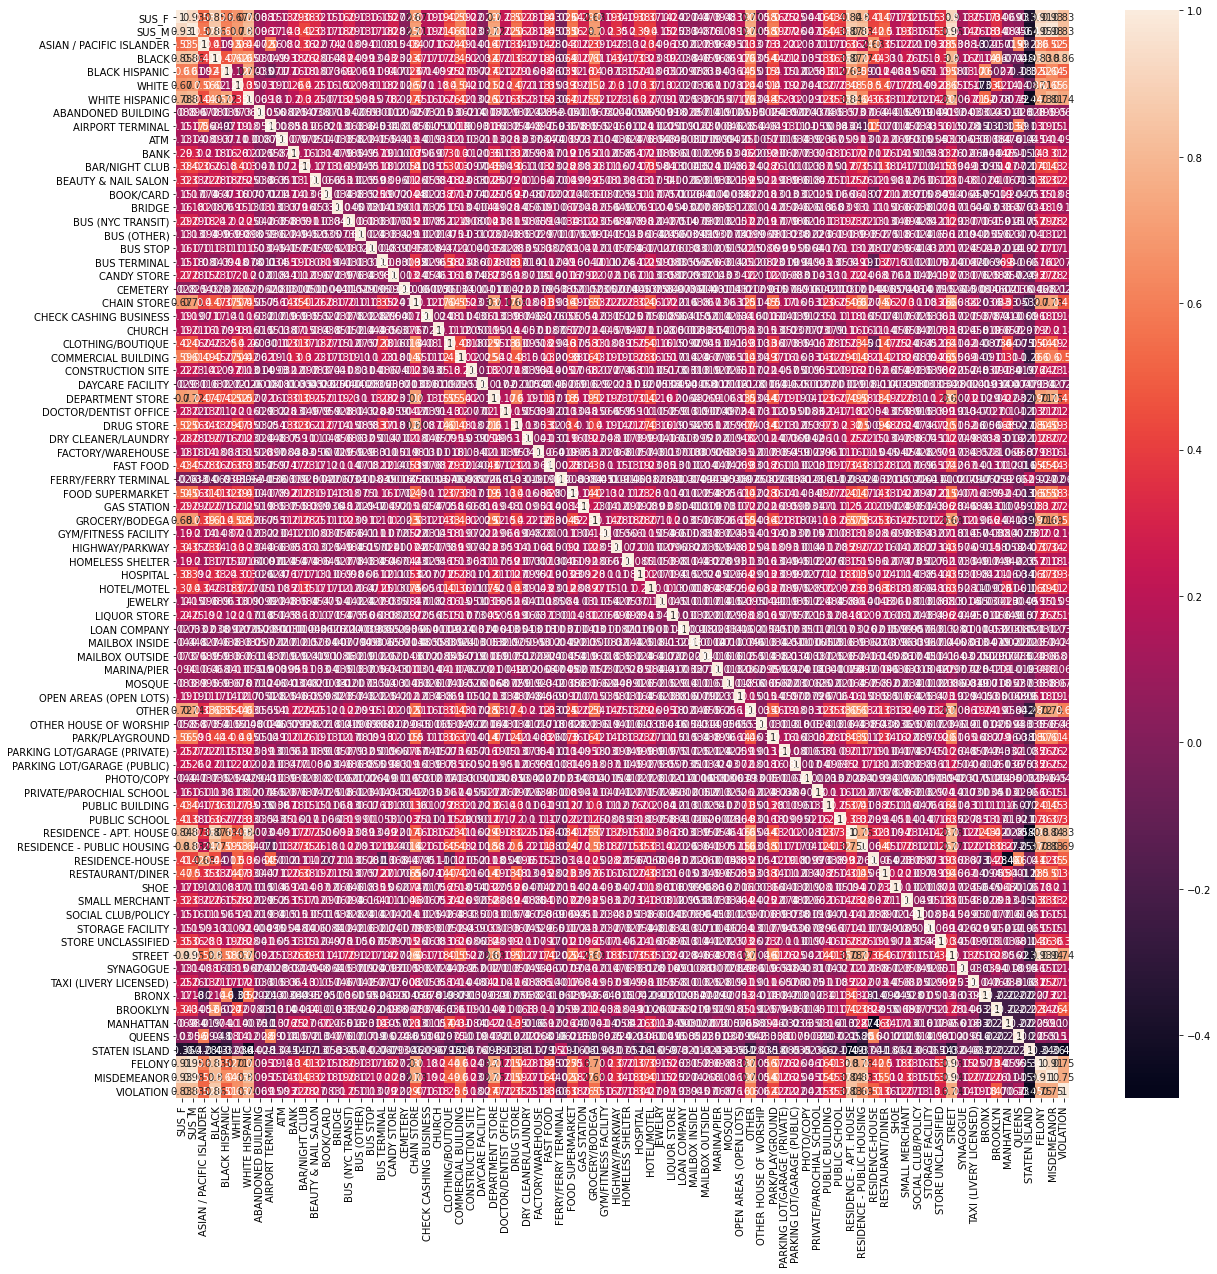

In [255]:
import seaborn as sns
corr=dfle.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(dfle[top_features].corr(),annot=True)

In [256]:
threshold=0.8

In [257]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [258]:
df = correlation(df.iloc[:,:-1],threshold)

In [264]:
dfle1 = dfle.drop(df,axis=1)

In [266]:
dfle1 = dfle1.drop('date',axis = 1)

In [267]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dfle1)
scaled_features = scaler.transform(dfle1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,dfle['Total'],
                                                    test_size=0.30)

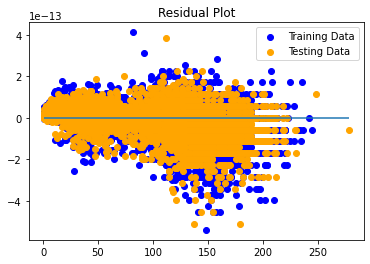

In [268]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [3]:
plt

NameError: name 'plt' is not defined

In [269]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 3.586467777893953e-27, R2: 1.0


In [270]:
prediction = model.predict(X_test)
print("Training accuracy:",model.score(X_train,y_train))
print("Testing accuracy:",model.score(X_test,y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


,date,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,WHITE,WHITE HISPANIC,ABANDONED BUILDING,AIRPORT TERMINAL,...,TAXI (LIVERY LICENSED),BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION,Total
0,2006-01-01,13.0,71.0,0.0,31.0,4.0,2.0,42.0,0.0,0.0,...,0.0,1,0,0,0,0,23.0,32.0,29.0,84
1,2006-01-01,15.0,98.0,2.0,50.0,4.0,13.0,34.0,0.0,0.0,...,0.0,0,1,0,0,0,31.0,50.0,32.0,113
2,2006-01-01,15.0,59.0,1.0,20.0,5.0,19.0,22.0,0.0,0.0,...,0.0,0,0,1,0,0,21.0,32.0,21.0,74
3,2006-01-01,18.0,70.0,8.0,30.0,2.0,11.0,29.0,0.0,1.0,...,0.0,0,0,0,1,0,29.0,42.0,18.0,89
4,2006-01-01,3.0,19.0,1.0,1.0,0.0,13.0,5.0,0.0,0.0,...,0.0,0,0,0,0,1,5.0,14.0,4.0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28068,2019-12-31,30.0,95.0,5.0,57.0,1.0,24.0,21.0,0.0,0.0,...,1.0,0,1,0,0,0,42.0,52.0,38.0,132
28069,2019-12-31,20.0,87.0,5.0,22.0,7.0,20.0,17.0,0.0,0.0,...,0.0,0,0,1,0,0,24.0,70.0,19.0,113
28070,2019-12-31,22.0,64.0,16.0,20.0,2.0,6.0,21.0,0.0,2.0,...,0.0,0,0,0,1,0,17.0,44.0,27.0,88
28071,2019-12-31,5.0,16.0,0.0,3.0,0.0,12.0,3.0,0.0,0.0,...,0.0,0,0,0,0,1,5.0,11.0,5.0,21


In [297]:
X= dfle.copy()
X = X.drop("date",axis = 1)
X = X.iloc[:, :-1].values
y = dfle1["Total"].values
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

In [298]:
X_train

array([[11., 45.,  1., ..., 17., 20., 19.],
       [11., 52.,  1., ..., 13., 31., 20.],
       [ 9., 21.,  2., ...,  8.,  7., 15.],
       ...,
       [10., 37.,  2., ...,  4., 25., 18.],
       [14., 43.,  1., ...,  9., 29., 19.],
       [ 7., 31.,  1., ...,  3., 19., 17.]])

In [299]:
X_test

array([[  7.,  22.,   0., ...,   2.,  22.,   5.],
       [  9.,  33.,   3., ...,   8.,  19.,  15.],
       [  0.,   1.,   0., ...,   1.,   0.,   0.],
       ...,
       [ 10.,  42.,   5., ...,  13.,  26.,  13.],
       [ 46., 133.,   3., ...,  55.,  89.,  40.],
       [  6.,  22.,   0., ...,   9.,  11.,   8.]])

In [300]:
y_train

array([56, 64, 30, ..., 47, 57, 39])

In [301]:
y_test

array([ 29,  42,   1, ...,  52, 184,  28])

In [302]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[-0.25 -0.04 -0.43 ...  0.19 -0.4   0.38]
 [-0.25  0.14 -0.43 ... -0.07 -0.04  0.48]
 [-0.41 -0.63 -0.2  ... -0.39 -0.83 -0.01]
 ...
 [-0.33 -0.23 -0.2  ... -0.64 -0.24  0.28]
 [-0.01 -0.09 -0.43 ... -0.32 -0.1   0.38]
 [-0.56 -0.38 -0.43 ... -0.71 -0.43  0.18]]


In [303]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [304]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 29.  29.]
 [ 42.  42.]
 [  1.   1.]
 ...
 [ 52.  52.]
 [184. 184.]
 [ 28.  28.]]


False